In [1]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib

aa = matplotlib.font_manager.FontProperties()
print(aa.get_family())

caltech101 = {'Tip_adapter_F':[89.21, 89.94, 91.12, 92.01, 92.86], 'CoOp':[87.8, 87.87, 89.57, 90.1, 92.07],
              'CLIP_adapter':[88.63, 89.42, 89.98, 91.95, 92.39], 'Ours_F':[90.47, 90.79, 91.67, 93.02, 93.14], 
             'Tip_adapter':[87.26, 88.32, 89.21, 89.57, 90.18], 'Ours':[90.47, 90.99, 91.81, 91.93, 92.49],
             'Tip_X':[88.39,88.6,89.29,89.81,90.7], 'zeroshot': 83.94, 'CALIP': 87.71}

dtd = {'Tip_adapter_F':[49.47, 54.14, 57.74, 62.65, 66.61], 'CoOp':[44.1, 46.0, 53.53, 59.63, 63.7],
        'CLIP_adapter':[45.87, 52.13, 57.07, 61.33, 65.03], 'Ours_F':[54.61, 58.81, 65.48, 67.02, 69.66], 
        'Tip_adapter':[46.28, 49.65, 53.96, 58.39, 60.7], 'Ours':[52.66, 58.63, 60.7, 66.08, 67.73],
        'Tip_X':[46.98,50.11,55.2,59.33,63.53], 'zeroshot':40.07, 'CALIP': 42.39}

eurosat = {'Tip_adapter_F':[59.10, 66.19, 73.46, 78.04, 84.98], 'CoOp':[51.3, 59.87, 70.3, 77.13, 83.27],
              'CLIP_adapter':[61.10, 63.07, 73.14, 78.0, 84.97], 'Ours_F':[65.85, 71.62, 74.72, 80.73, 86.7], 
             'Tip_adapter':[54.43, 61.43, 65.52, 67.96, 70.63], 'Ours':[59.79, 62.86, 70.33, 74.51, 78.16],
             'Tip_X':[55.88,61.54,68.14,68.85,73.16], 'zeroshot':37.54, 'CALIP': 38.9}

fgvc = {'Tip_adapter_F':[20.67, 23.76, 26.16, 30.27, 35.13], 'CoOp':[8.87, 18.63, 20.3, 27.33, 31.67],
        'CLIP_adapter':[17.60, 20.05, 22.47, 27.37, 31.37], 'Ours_F':[24.69, 25.59, 29.16, 33.36, 39.62], 
             'Tip_adapter':[18.81, 21.24, 22.14, 25.5, 29.94], 'Ours':[20.85, 22.89, 24.39, 28.32, 31.26],
             'Tip_X':[20.1,21.93,22.92,26.91,30.12], 'zeroshot':17.1, 'CALIP': 17.76}

food101 = {'Tip_adapter_F':[77.54, 77.73, 78.14, 78.51, 79.28], 'CoOp':[74.3, 71.77, 73.33, 71.93, 74.47],
              'CLIP_adapter':[77.43, 77.77, 78.10, 78.53, 79.03], 'Ours_F':[77.62, 78.06, 78.57, 78.86, 79.53], 
             'Tip_adapter':[77.42, 77.5, 77.52, 77.7, 77.87], 'Ours':[77.59, 77.64, 77.59, 78.27, 78.5],
             'Tip_X':[77.38,77.53,77.5,77.87,77.93], 'zeroshot':77.32, 'CALIP': 77.42}

imagenet = {'Tip_adapter_F':[61.32, 61.69, 62.52, 64.00, 65.51], 'CoOp':[57.57, 57.86, 59.63, 61.57, 62.97],
            'CLIP_adapter':[61.2, 61.3, 61.85, 62.8, 63.7], 'Ours_F':[62.51, 63.25, 63.66, 64.8, 66.07], 
            'Tip_adapter':[60.68, 60.94, 60.98, 61.45, 62.03], 'Ours':[62.04, 62.34, 62.54, 62.79, 63.42],
            'Tip_X':[60.73, 61.03, 61.1, 61.57, 62.16], 'zeroshot': 60.31, 'CALIP': 60.57,

            'Ours_rn101':[62.91, 63.54, 63.77, 64.56, 65.3], 'Ours_vitb16':[70.43, 70.91,71.29, 71.59, 72.17], 
            'Ours_vitb32':[65.32, 65.81, 65.9, 66.49, 67.05], 'Ours_rn50':[62.04, 62.34, 62.54, 62.79, 63.42],
            'Ours-F_rn101':[64.71, 65.87, 66.73, 68.15, 69.46], 'Ours-F_vitb16':[70.88, 71.43, 71.99, 73.37, 74.33], 
            'Ours-F_vitb32':[65.75, 66.55, 67.17, 68.41, 69.29], 'Ours-F_rn50':[62.51, 63.25, 63.66, 64.8, 66.07],}

oxford_flowers = {'Tip_adapter_F':[80.02, 83.19, 89.44, 91.72, 94.44], 'CoOp':[69.07, 78.00, 85.80, 91.40, 94.73],
              'CLIP_adapter':[73.9, 82.03, 87.13, 90.50, 94.10], 'Ours_F':[83.31, 87.9, 92.08, 94.68, 96.14], 
             'Tip_adapter':[73.2, 79.01, 83.8, 87.9, 89.81], 'Ours':[79.62, 83.68, 87.9, 91.11, 91.96],
             'Tip_X':[73.44,79.41,85.92,88.59,90.29], 'zeroshot':66.1, 'CALIP': 66.38}

oxford_pets = {'Tip_adapter_F':[86.40, 87.08, 87.24, 88.09, 89.64], 'CoOp':[85.87, 82.03, 87.03, 85.4, 86.30],
            'CLIP_adapter':[85.8, 86.13, 86.76, 87.93, 88.73], 'Ours_F':[87.11, 87.3, 88.53, 88.83, 90.24], 
             'Tip_adapter':[86.02, 86.97, 86.48, 86.94, 88.53], 'Ours':[86.26, 87.06, 87.31, 87.55, 88.88],
             'Tip_X':[85.41,87.95,88.28,89.12,89.86], 'zeroshot':85.83, 'CALIP': 86.21}

stanford_cars = {'Tip_adapter_F':[58.85, 60.79, 64.92, 69.39, 75.31], 'CoOp':[56.23, 58.73, 62.90, 67.85, 73.33],
              'CLIP_adapter':[57.03, 57.87, 58.97, 68.02, 74.1], 'Ours_F':[60.79, 63.86, 68.41, 71.38, 76.53], 
             'Tip_adapter':[57.38, 58.55, 61.52, 63.08, 66.71], 'Ours':[59.57, 61.39, 65.09, 66.71, 70.31],
             'Tip_X':[58.79,60.27,63.84,65.81,67.3], 'zeroshot':55.71, 'CALIP': 56.27}

sun397 = {'Tip_adapter_F':[62.57, 63.77, 65.59, 69.19, 71.37], 'CoOp':[60.03, 60.00, 63.40, 65.73, 69.40],
        'CLIP_adapter':[60.6, 62.3, 63.7, 67.42, 69.73], 'Ours_F':[66.01, 67.32, 69.05, 71.1, 72.73], 
             'Tip_adapter':[61.27, 62.72, 64.24, 65.59, 66.83], 'Ours':[64.37, 65.93, 66.64, 68.37, 69.72],
             'Tip_X':[61.69,63.38,64.94,66.28,68.], 'zeroshot':58.53, 'CALIP':58.7}

ucf101 = {'Tip_adapter_F':[64.95, 66.38, 70.98, 74.65, 77.5], 'CoOp':[62.67, 63.60, 69.4, 72.5, 76.07],
              'CLIP_adapter':[62.77, 64.17, 69.10, 72.9, 76.30], 'Ours_F':[66.51, 69.23, 73.43, 75.43, 79.73], 
             'Tip_adapter':[62.73, 64.76, 66.19, 68.46, 70.68], 'Ours':[63.26, 65.72, 69.92, 71.74, 74.49],
             'Tip_X':[62.78,66.45,66.87,68.88,71.95], 'zeroshot':61.33, 'CALIP': 61.72}

data_dict = {"Caltech-101": caltech101, 'DTD': dtd, 'EuroSat': eurosat, 'FGVC': fgvc, 'Food101': food101, 'ImageNet': imagenet,
             'OxfordFlowers': oxford_flowers, 'OxfordPets': oxford_pets, 'StanfordCars': stanford_cars, 'SUN397': sun397, 'UCF101': ucf101}

data_range = {"Caltech-101": [85.5, 93.5], 'DTD': [42, 68], 'EuroSat': [38, 86], 'FGVC': [8, 36], 'Food101': [71, 80], 'ImageNet': [57, 66],
             'OxfordFlowers': [65, 95], 'OxfordPets': [81, 90.5], 'StanfordCars': [55, 76], 'SUN397': [59, 72], 'UCF101': [61, 79]}

['sans-serif']


In [2]:
Tip_Adapter_F = np.array([0.]*5)
CoOp = np.array([0.]*5)
CLIP_Adapter = np.array([0.]*5)
Ours = np.array([0.]*5)
Tip_Adapter = np.array([0.]*5)
Ours_F = np.array([0.]*5)
Tip_X = np.array([0.]*5)
CALIP = np.array([0.])
Zeroshot = np.array([0.])

for k, v in data_dict.items():
    Tip_Adapter_F += np.array(data_dict[k]['Tip_adapter_F'])
    CoOp += np.array(data_dict[k]['CoOp'])
    CLIP_Adapter += np.array(data_dict[k]['CLIP_adapter'])
    Ours += np.array(data_dict[k]['Ours'])
    Tip_Adapter += np.array(data_dict[k]['Tip_adapter'])
    Ours_F += np.array(data_dict[k]['Ours_F'])
    Tip_X += np.array(data_dict[k]['Tip_X'])
    Zeroshot += np.array(data_dict[k]['zeroshot'])
    CALIP += np.array(data_dict[k]['CALIP'])

overall = {'Tip_adapter_F': Tip_Adapter_F/11, 'CoOp': CoOp/11, 'Tip_adapter': Tip_Adapter/11, 'Tip_X': Tip_X/11, 
           'CLIP_adapter': CLIP_Adapter/11, 'Ours': Ours/11, 'Ours_F': Ours_F/11, 'CALIP':CALIP/11, 'zeroshot':Zeroshot/11}


In [3]:
def drawCurve_trainingfree(datadic, name, y1, y2, backbone='rn50'):
    
    Tip_Adapter_F = datadic['Tip_adapter_F']
    Tip_Adapter = datadic['Tip_adapter']
    CoOp = datadic['CoOp']
    CLIP_Adapter = datadic['CLIP_adapter']
    Ours = datadic['Ours']
    Ours_F = datadic['Ours_F']
    Tip_X = datadic['Tip_X']
    CALIP = datadic['CALIP']

    plt.figure(figsize=(5.5, 4.5))
    ax = plt.axes()
    ax.set_facecolor(color=(244/255, 244/255, 244/255, 1))
    plt.grid(color=(255/255, 255/255, 255/255, 1))
    
    x = [1, 2, 4, 8, 16]
    plt.plot(x, Tip_Adapter, color=(78/255, 141/255, 153/255, 1), label='Tip-Adapter', linestyle='-.', linewidth=1.5, marker='v',markersize=5)
    plt.plot(x, Tip_X, color=(105/255, 101/255, 53/255, 1), label='Tip-X', linestyle='-.', linewidth=1.5, marker='v',markersize=5)# v28
    plt.plot(x, Ours, color=(200/255, 105/255, 104/255, 1), label='APE', linestyle='-.', linewidth=1.5, marker='*',markersize=7)# v28
    plt.scatter([0], [datadic['CALIP']], label='CALIP', s=90, marker='*', color=(186/255, 85/255, 211/255, 1))
    plt.scatter([0], [datadic['zeroshot']], label='Zero-shot CLIP', s=90, marker='*', color=(254/255, 1/255, 1/255, 1))
 
    plt.legend(bbox_to_anchor=(0.54, 0.01, 0.44, 0.39), loc=3, ncol=1, prop={'family' : 'Times New Roman', 'size': 16}, mode="expand", numpoints=0.5, borderaxespad=0., fontsize=10, edgecolor="white") #
    #plt.legend(bbox_to_anchor=(0.02, 0.63, 0.37, 0.37), loc=3, ncol=1, prop={'family' : 'Times New Roman', 'size': 15}, mode="expand", numpoints=0.5, borderaxespad=0., fontsize=10, edgecolor="white") #
    
    plt.xticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16])
    #plt.yticks([4, 5.1, 6.2, 7.3, 8.4], [1500, 1800, 2100, 2400, 2700])
    plt.xticks(fontproperties = 'Times New Roman', fontsize=17)  # 
    plt.yticks(fontproperties = 'Times New Roman', fontsize=17)
    plt.ylabel('Accuracy (%)', fontdict={'family': 'Times New Roman', 'size': 18})
    plt.xlabel('Shots Number', fontdict={'family': 'Times New Roman', 'size': 18})
    plt.xlim((0.2, 16.8))
    plt.ylim((y1, y2))
    plt.title('{}'.format(name), fontdict={'family': 'Times New Roman', 'size': 20})
    
    plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-0.1)
    
    plt.savefig('{}.pdf'.format(name))
    plt.show()
    

In [10]:
def drawCurve_train(datadic, name, y1, y2, backbone='rn50'):
    
    Tip_Adapter_F = datadic['Tip_adapter_F']
    Tip_Adapter = datadic['Tip_adapter']
    CoOp = datadic['CoOp']
    CLIP_Adapter = datadic['CLIP_adapter']
    Ours = datadic['Ours']
    Ours_F = datadic['Ours_F']
    Tip_X = datadic['Tip_X']
    CALIP = datadic['CALIP']
        
    plt.figure(figsize=(5.5, 4.5))
    ax = plt.axes()
    ax.set_facecolor(color=(244/255, 244/255, 244/255, 1))
    plt.grid(color=(255/255, 255/255, 255/255, 1))
    
    x = [1, 2, 4, 8, 16]
    
    plt.plot(x, CoOp, color=(105/255, 101/255, 53/255, 1), label='CoOp', linestyle='-', linewidth=1.5, marker='v',markersize=5) # v27
    plt.plot(x, CLIP_Adapter, color=(121/255, 114/255, 161/255, 1), label='CLIP-Adapter', linestyle='-', linewidth=1.5, marker='v',markersize=5) # v27
    plt.plot(x, Tip_Adapter_F, color=(78/255, 141/255, 153/255, 1), label='Tip-Adapter-F', linestyle='-', linewidth=1.5, marker='v',markersize=5)
    plt.plot(x, Ours_F, color=(200/255, 105/255, 104/255, 1), label='APE-T', linestyle='-', linewidth=1.5, marker='*',markersize=7)# v28
    
    #plt.legend(bbox_to_anchor=(0.54, 0.01, 0.44, 0.39), loc=3, ncol=1, prop={'family' : 'Times New Roman', 'size': 16}, mode="expand", numpoints=0.5, borderaxespad=0., fontsize=10, edgecolor="white") #
    plt.legend(bbox_to_anchor=(0.02, 0.63, 0.37, 0.37), loc=3, ncol=1, prop={'family' : 'Times New Roman', 'size': 15}, mode="expand", numpoints=0.5, borderaxespad=0., fontsize=10, edgecolor="white") #
    
    plt.xticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16])
    #plt.yticks([4, 5.1, 6.2, 7.3, 8.4], [1500, 1800, 2100, 2400, 2700])
    plt.xticks(fontproperties = 'Times New Roman', fontsize=17)  # 
    plt.yticks(fontproperties = 'Times New Roman', fontsize=17)
    plt.ylabel('Accuracy (%)', fontdict={'family': 'Times New Roman', 'size': 18})
    plt.xlabel('Shots Number', fontdict={'family': 'Times New Roman', 'size': 18})
    plt.xlim((0.2, 16.8))
    plt.ylim((y1, y2))
    plt.title('{}'.format(name), fontdict={'family': 'Times New Roman', 'size': 20})
    
    plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-0.1)
    
    plt.savefig('{}.pdf'.format(name))
    plt.show()
    

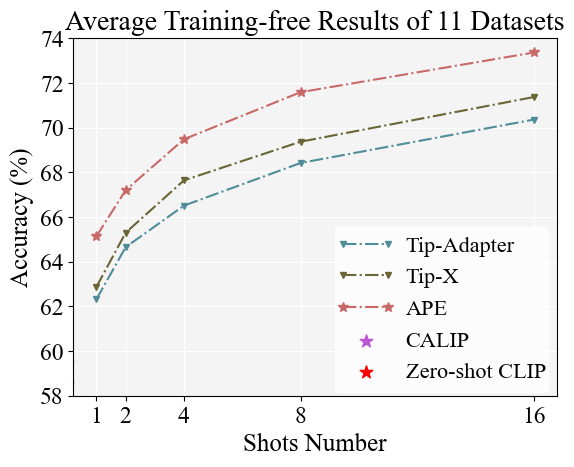

In [11]:
drawCurve_trainingfree(overall, "Average Training-free Results of 11 Datasets", 58, 74)

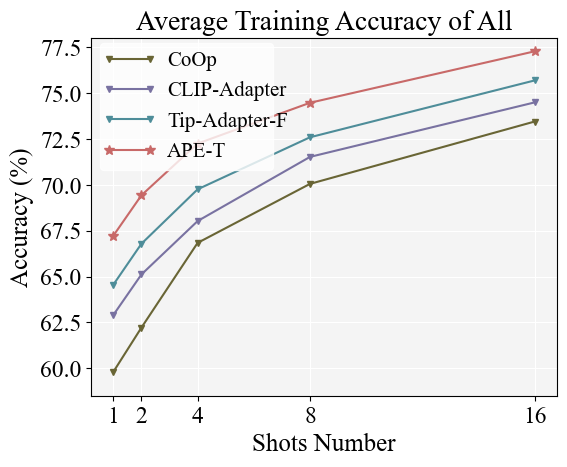

In [13]:
drawCurve_train(overall, "Average Training Accuracy of All", 58.5, 78)

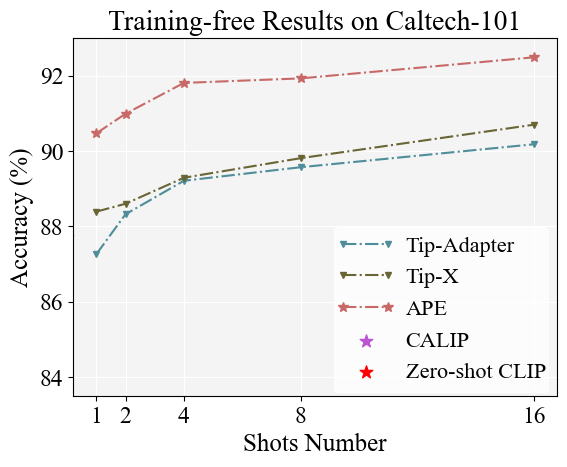

In [14]:
drawCurve_trainingfree(caltech101, "Training-free Results on Caltech-101", 83.5, 93)

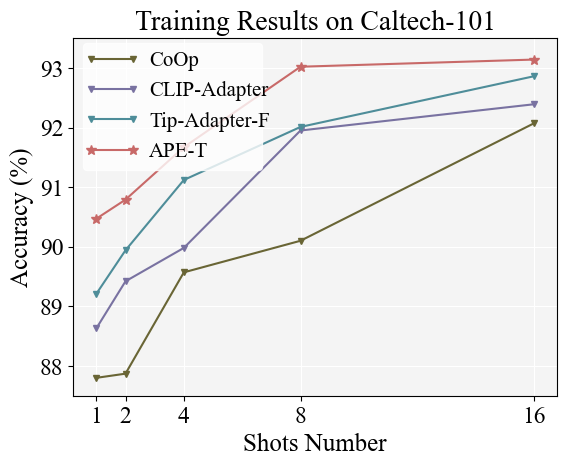

In [15]:
drawCurve_train(caltech101, "Training Results on Caltech-101", 87.5, 93.5)

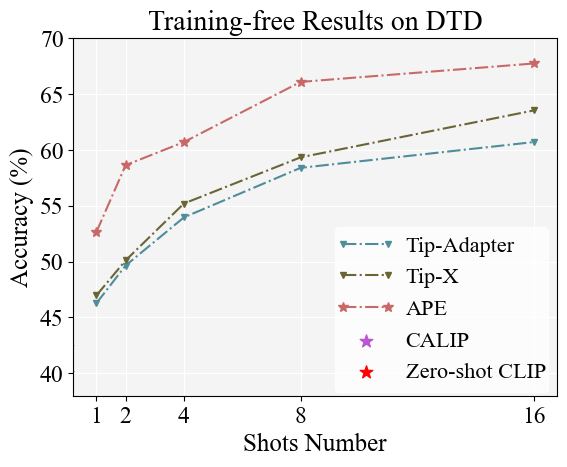

In [16]:
drawCurve_trainingfree(dtd, "Training-free Results on DTD", 38, 70)

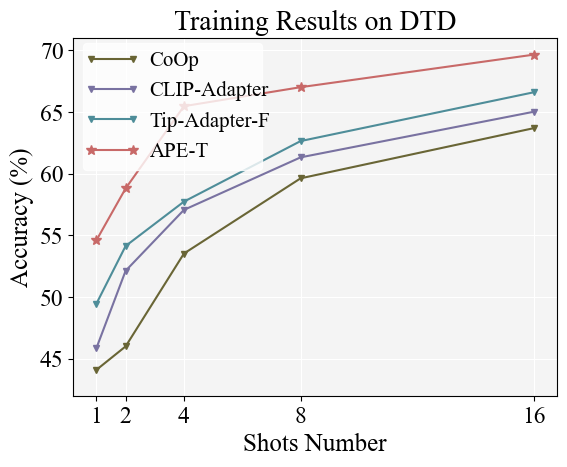

In [17]:
drawCurve_train(dtd, "Training Results on DTD", 42, 71)

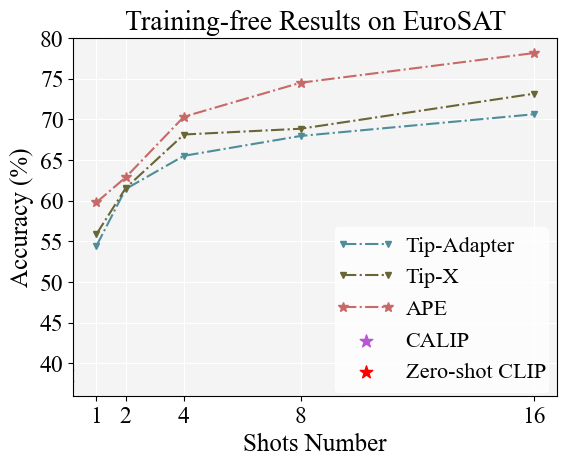

In [18]:
drawCurve_trainingfree(eurosat, "Training-free Results on EuroSAT", 36, 80)

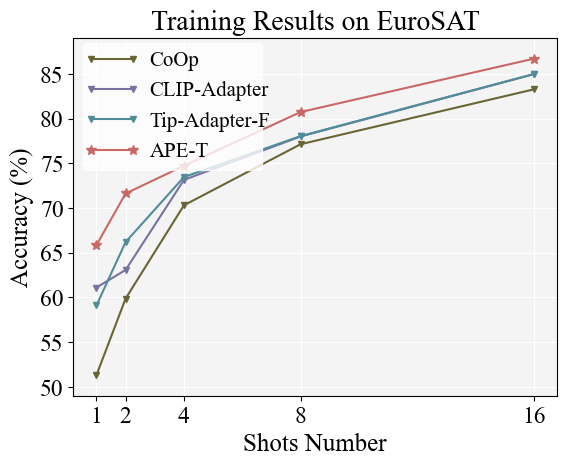

In [19]:
drawCurve_train(eurosat, "Training Results on EuroSAT", 49, 89)

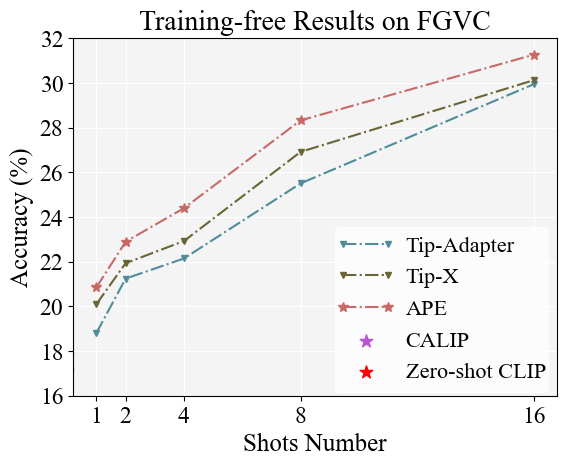

In [20]:
drawCurve_trainingfree(fgvc, "Training-free Results on FGVC", 16, 32)

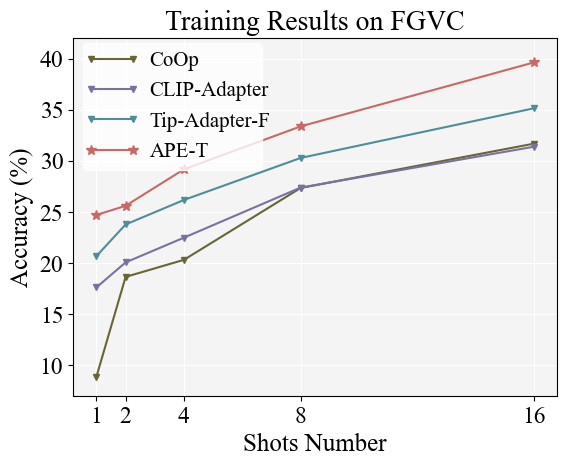

In [21]:
drawCurve_train(fgvc, "Training Results on FGVC", 7, 42)

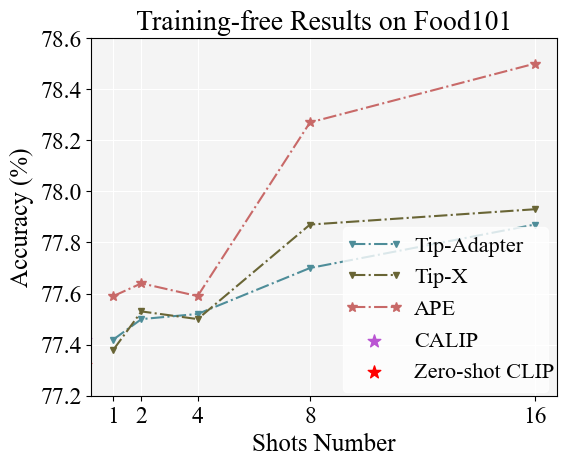

In [22]:
drawCurve_trainingfree(food101, "Training-free Results on Food101", 77.2, 78.6)

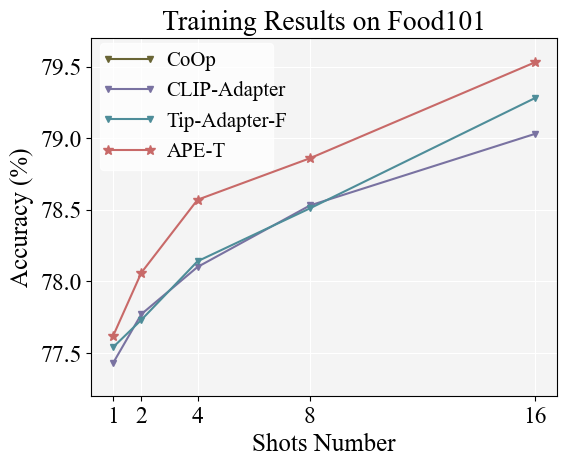

In [23]:
drawCurve_train(food101, "Training Results on Food101", 77.2, 79.7)

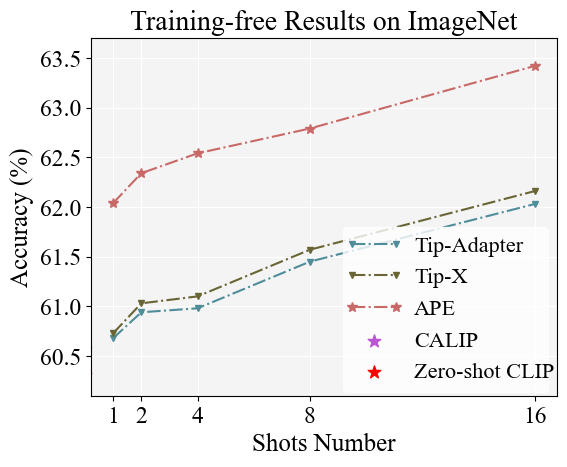

In [24]:
drawCurve_trainingfree(imagenet, "Training-free Results on ImageNet", 60.1, 63.7)

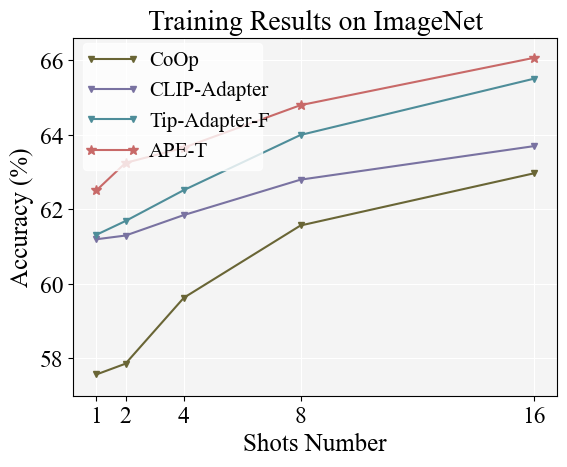

In [25]:
drawCurve_train(imagenet, "Training Results on ImageNet", 57, 66.6)

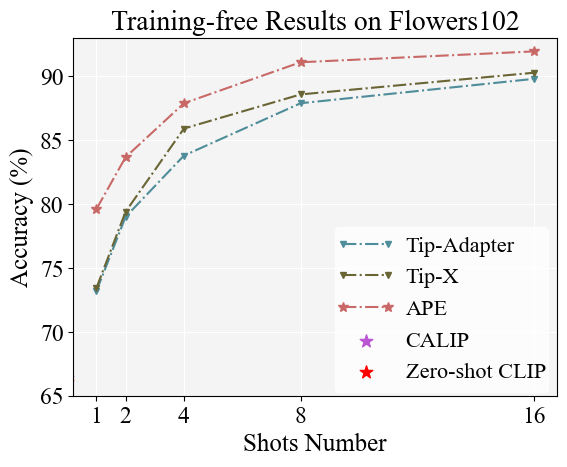

In [26]:
drawCurve_trainingfree(oxford_flowers, "Training-free Results on Flowers102", 65, 93)

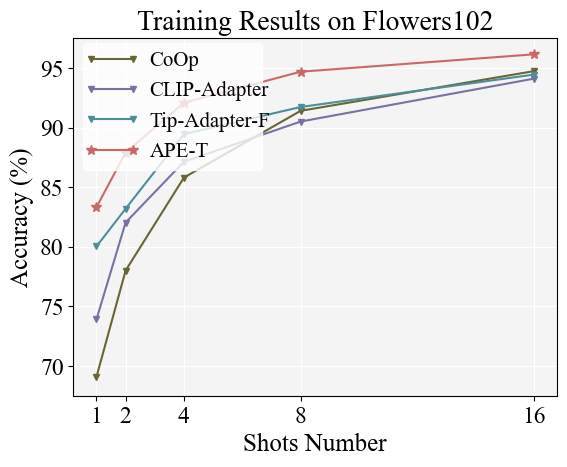

In [27]:
drawCurve_train(oxford_flowers, "Training Results on Flowers102", 67.5, 97.5)

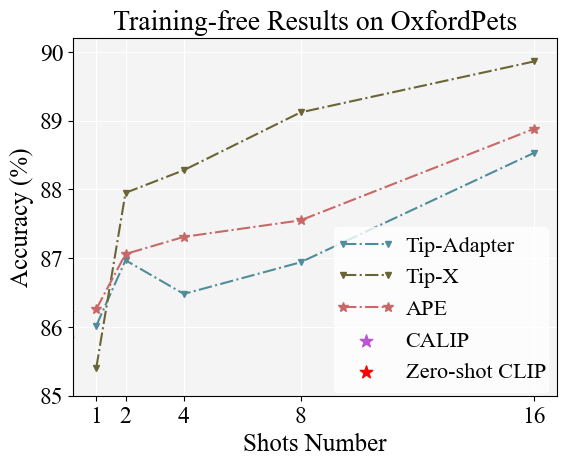

In [28]:
drawCurve_trainingfree(oxford_pets, "Training-free Results on OxfordPets", 85., 90.2)

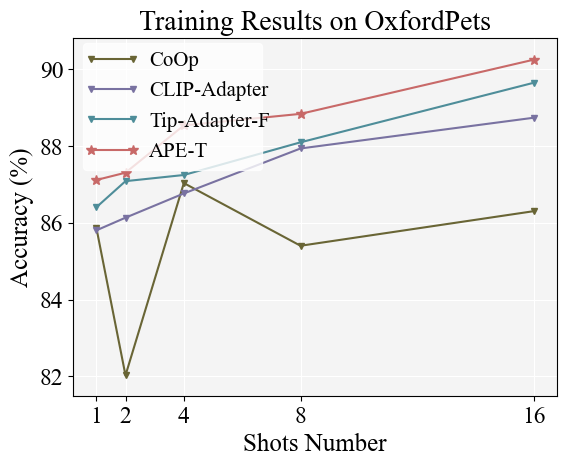

In [29]:
drawCurve_train(oxford_pets, "Training Results on OxfordPets", 81.5, 90.8)

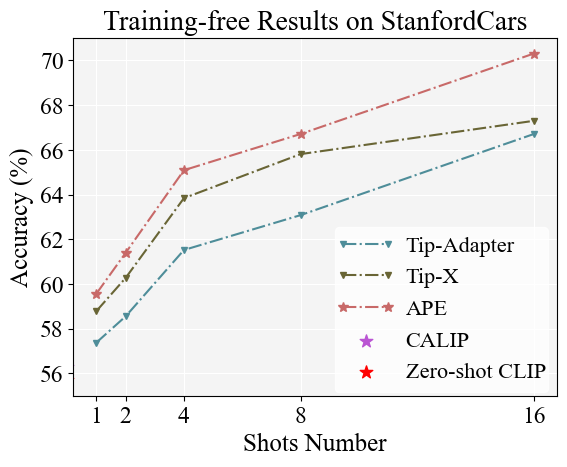

In [30]:
drawCurve_trainingfree(stanford_cars, "Training-free Results on StanfordCars", 55, 71)

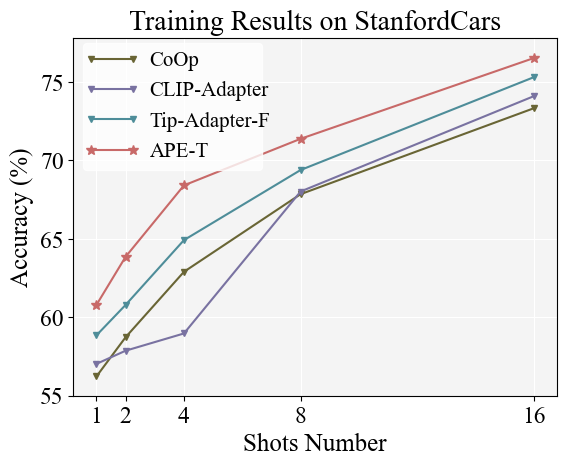

In [31]:
drawCurve_train(stanford_cars, "Training Results on StanfordCars", 55, 77.8)

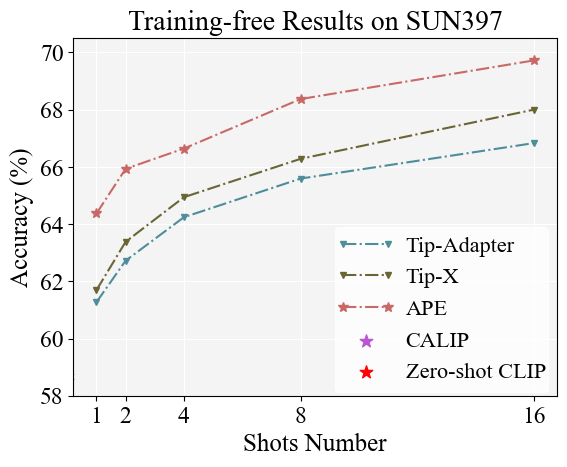

In [32]:
drawCurve_trainingfree(sun397, "Training-free Results on SUN397", 58, 70.5)

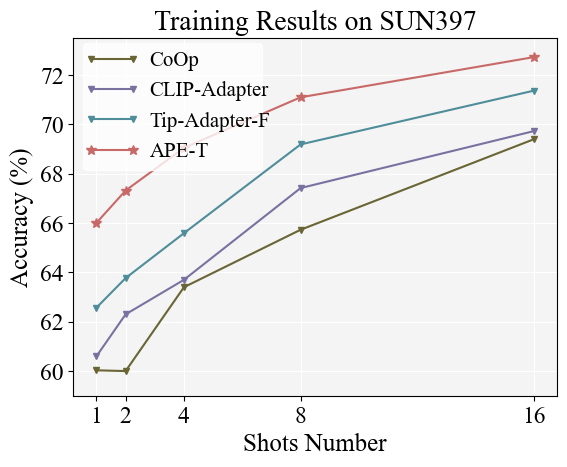

In [33]:
drawCurve_train(sun397, "Training Results on SUN397", 59, 73.5)

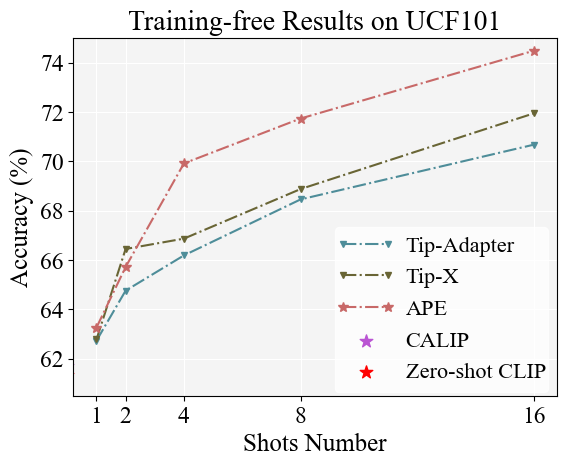

In [34]:
drawCurve_trainingfree(ucf101, "Training-free Results on UCF101", 60.5, 75)

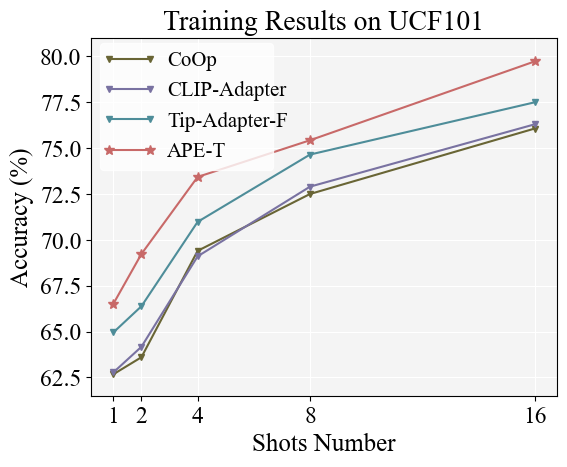

In [35]:
drawCurve_train(ucf101, "Training Results on UCF101", 61.5, 81)